# Задание
Требуется выполнить следующие действия<cite data-cite="ue:dz"></cite>:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию `GridSearchCV`, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# Ход выполнения работы

## Выбор набора данных для построения моделей машинного обучения
В качестве набора данных будем использовать данные о поддержанных машинах в Индии<cite data-cite="kg:ucpi"></cite>. Данный набор данных доступен по следующему адресу: <https://www.kaggle.com/avikasliwal/used-cars-price-prediction>.

Выбранный набор данных состоит из одного файла `used_cars.csv`, содержащего все данные датасета. Данный файл содержит следующие колонки:

* `Name` — Модель автомобиля.
* `Location` — Местоположение, где продавался автомобиль или продается до сих пор.
* `Year` — Год выпуска модели автомобиля.
* `Kilometers_Driven` — Пробег автомобиля ($\text{км}$).
* `Fuel_Type` — Тип топлива, используемого в автомобиле (Бензин, Дизель, Электричество, Компримированный природный газ, Сжиженный природный газ).
* `Transmission ` — Тип трансмиссии, используемой в автомобиле (Автоматическая / Механическая).
* `Owner_Type` — Владелец по счету.
* `Mileage` — Стандартный пробег, предлагаемый автомобильной компанией ($\text{км/л}$).
* `Engine` — Объем двигателя ($\text{cм}^3$).
* `Power` — Количество лошадиных сил.
* `Seats` — Количество сидений в автомобиле.
* `New_Price` — Цена нового автомобиля данной модели.
* `Price` — Цена подддержанного автомобиля данной модели.

В рассматриваемом примере будем решать задачу регрессии, где в качестве целевого признака будем использовать `Price`.

### Импорт библиотек

Подключим все необходимые библиотеки и настроим отображение графиков<cite data-cite="doc:ipython,doc:seaborn"></cite>:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Enable inline plots
%matplotlib inline

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на А4<cite data-cite="doc:pandas"></cite>:

In [2]:
pd.set_option("display.width", 70)

### Загрузка данных

Загрузим выбранный датасет:

In [3]:
data = pd.read_csv("./used_cars.csv")

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных

### Характеристики датасета

Посмотрим на данные:

In [4]:
data.head(10)

,Index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95


Удалим ненужные столбцы:

In [5]:
data = data.drop(["Index", "New_Price"], axis=1)

Стобец `Index` удалим в силу его бесполезности, а столбец `New_Price` из-за малого количества данных в этом столбце.

Посмотрим на оставшиеся столбцы:

In [6]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95


Посмотрим на размер данных:

In [7]:
data.shape

(6019, 12)

Посмотрим на типы данных:

In [8]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Проверим данные на наличие пропусков:

In [9]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

Заполним пропуски медианным значением:

In [10]:
median_imp = SimpleImputer(strategy="median") 
data[["Mileage"]] =  median_imp.fit_transform(data[["Mileage"]])
data[["Engine"]] = median_imp.fit_transform(data[["Engine"]])
data[["Power"]] = median_imp.fit_transform(data[["Power"]])
data[["Seats"]] = median_imp.fit_transform(data[["Seats"]])

In [11]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Посмотрим на основные статистические характеристики набора данных:

In [12]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134966,1620.509221,112.883539,5.276790,9.479468
std,3.269742,9.126884e+04,4.581528,599.635458,53.283701,0.806346,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


### Визуальное исследование датасета

Построим некоторые графики для понимания структуры данных.

Парные диаграммы:

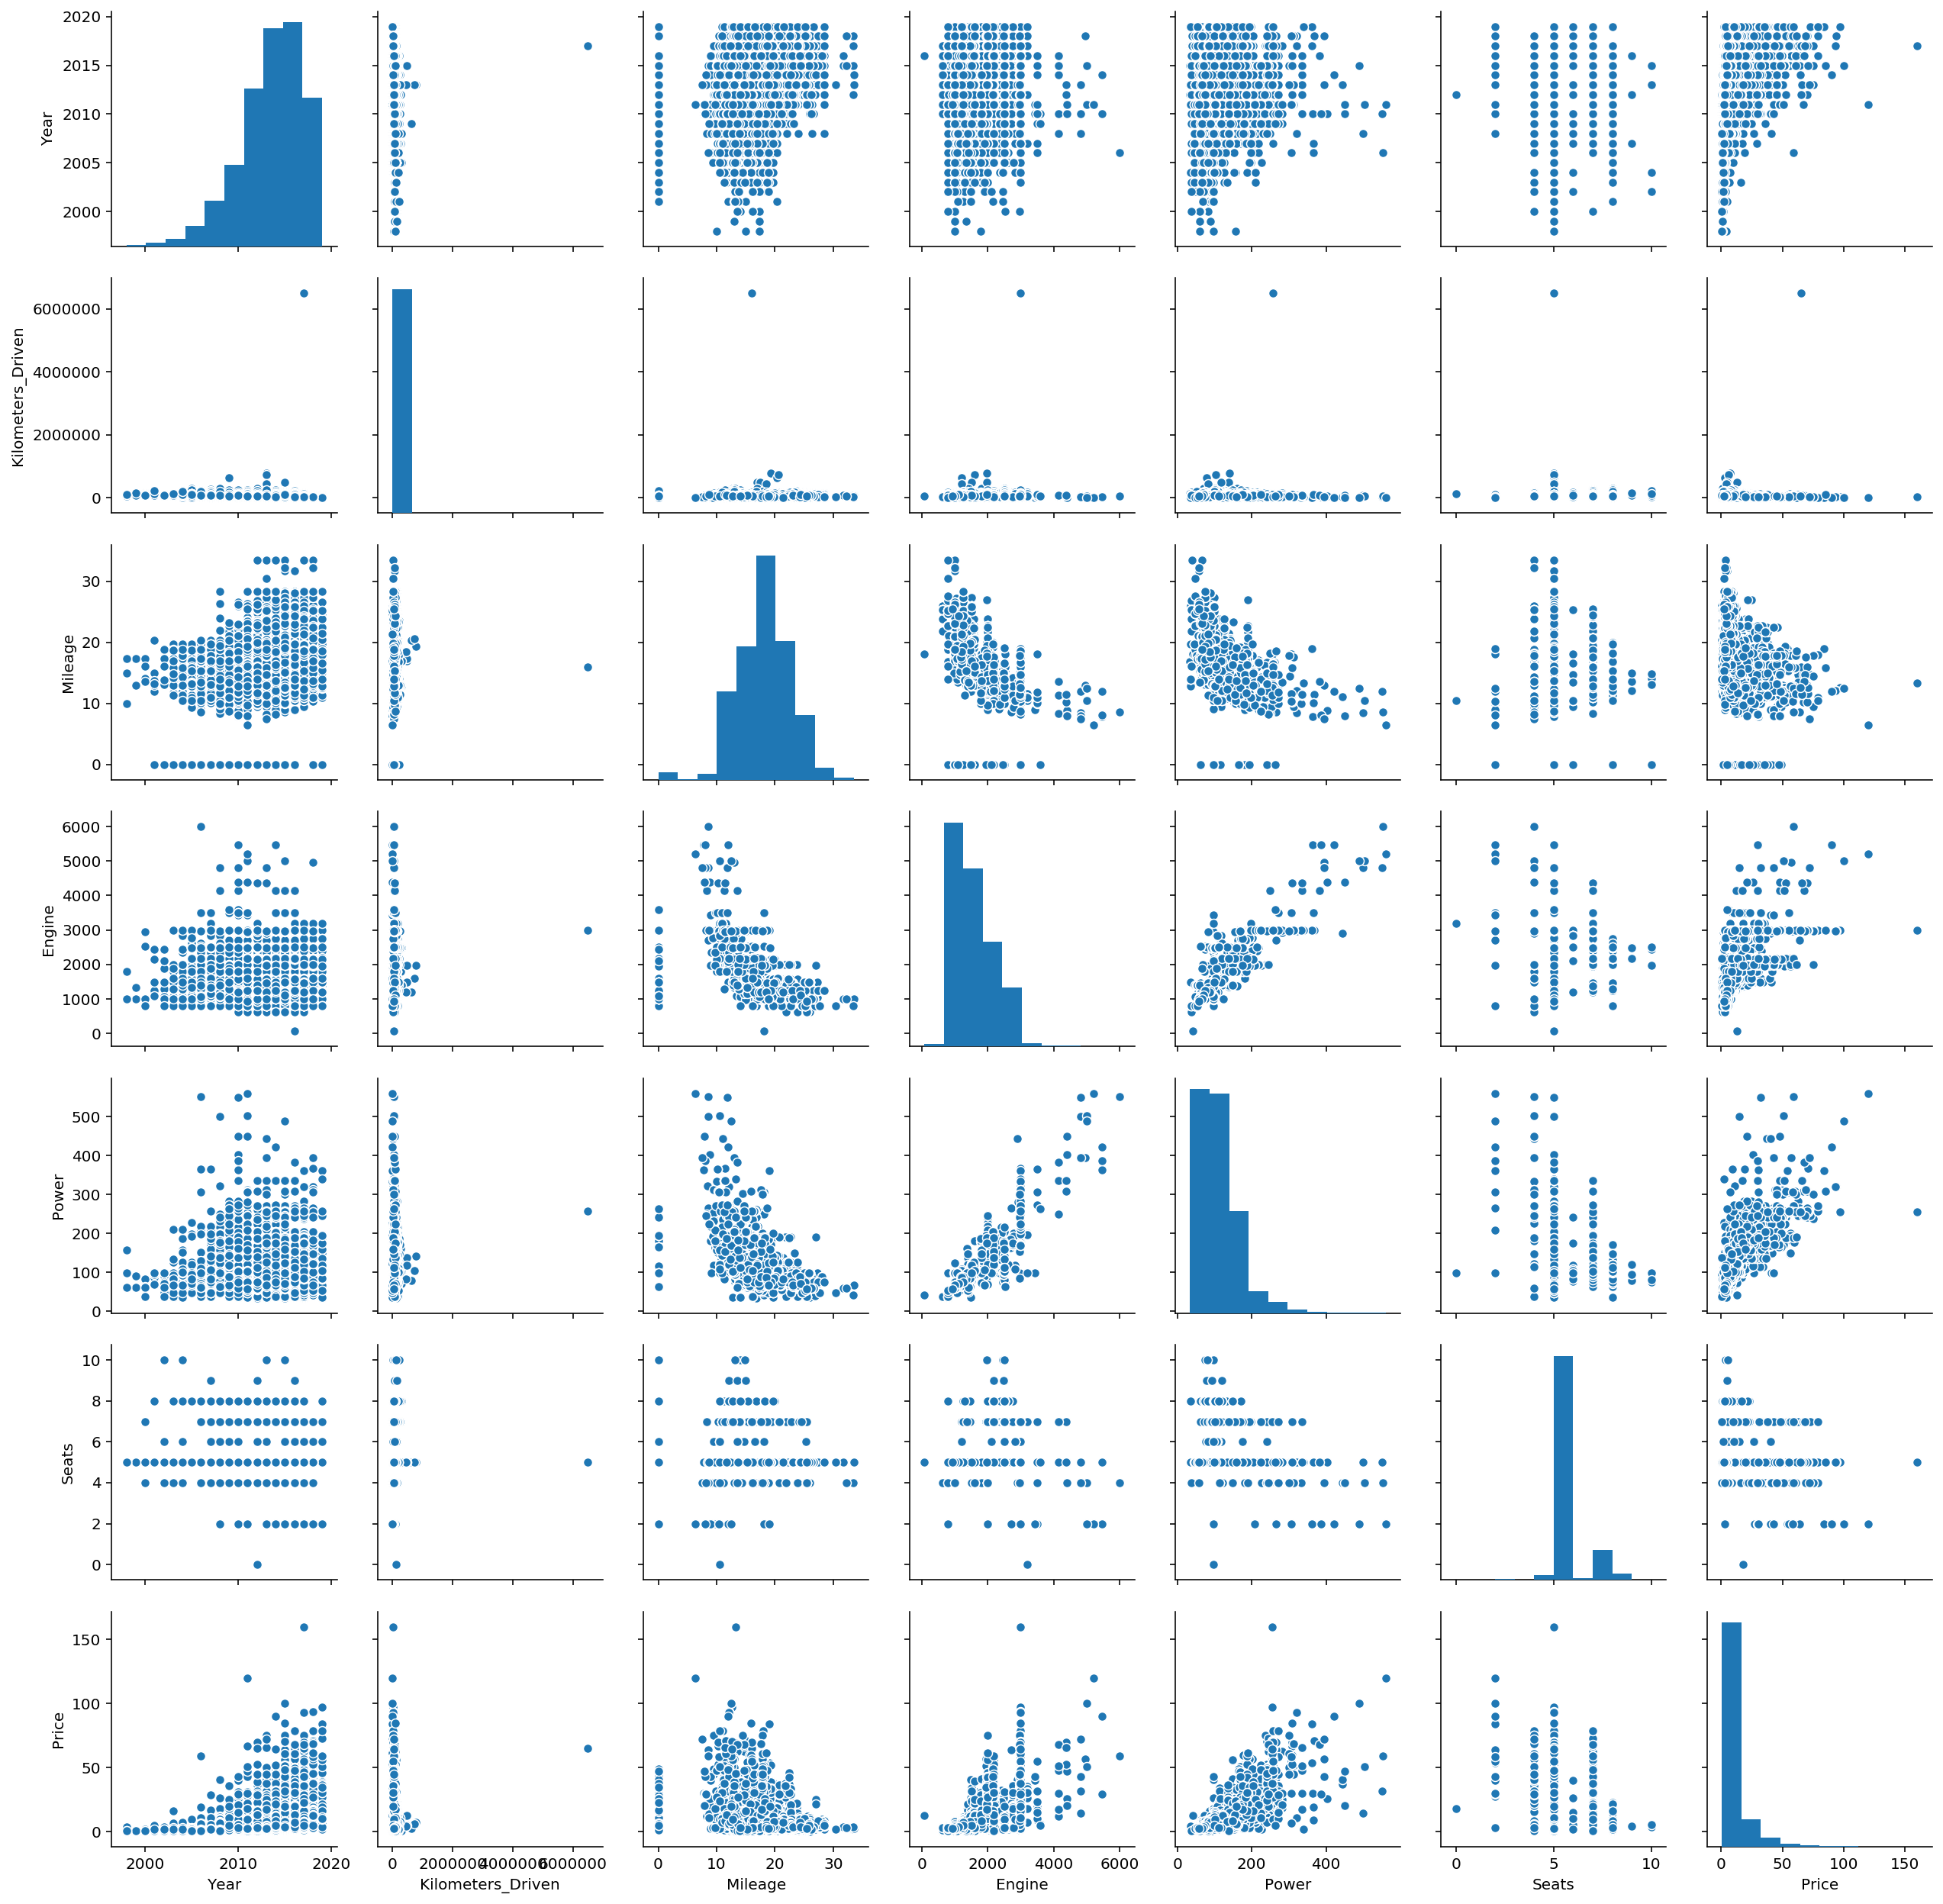

In [13]:
sns.pairplot(data)

Скрипичные диаграммы для числовых колонок:

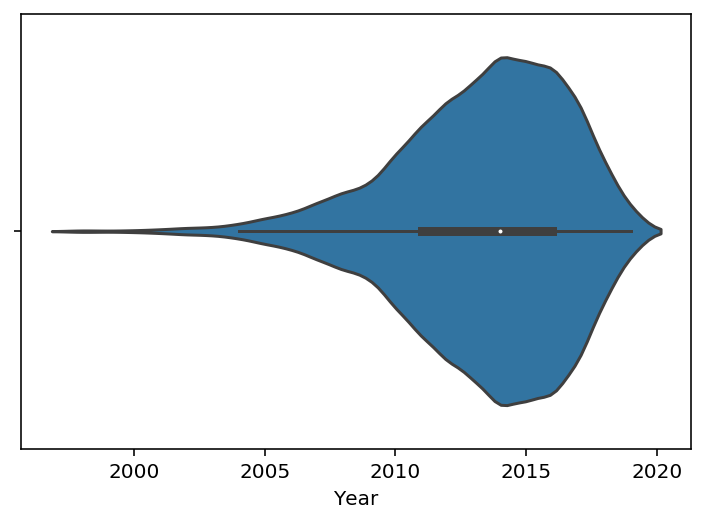

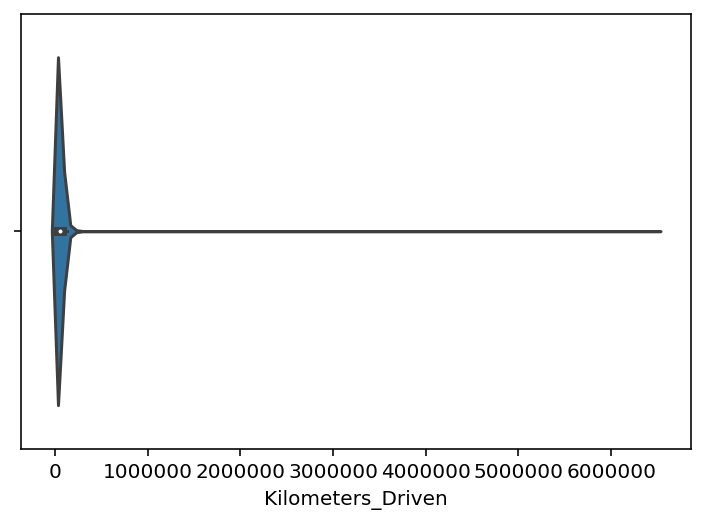

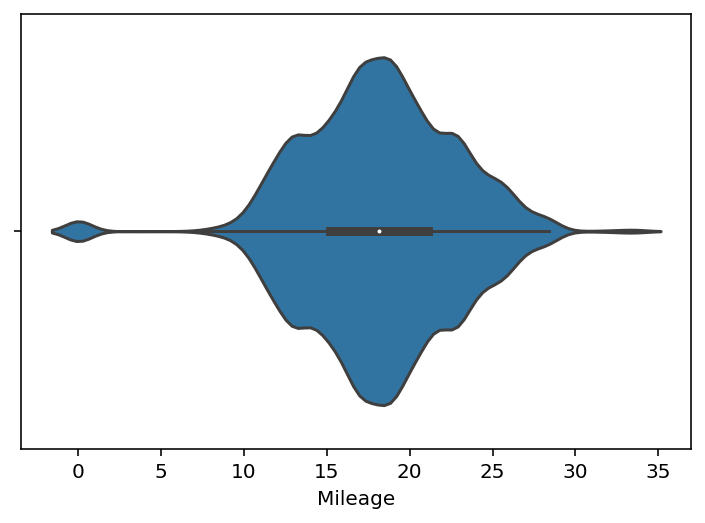

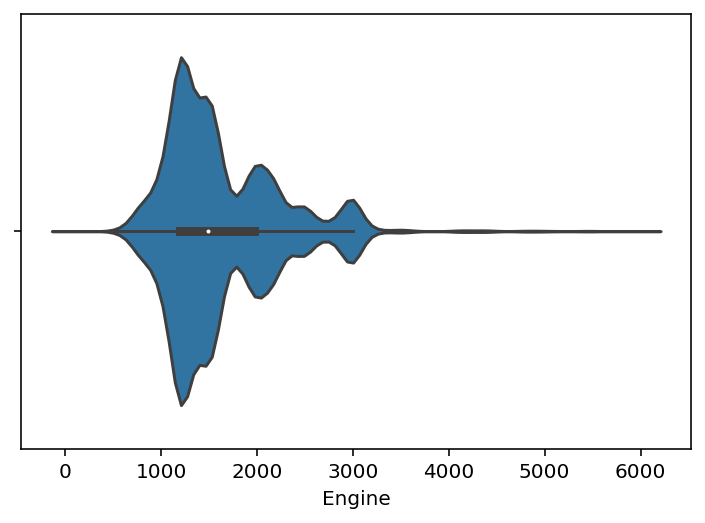

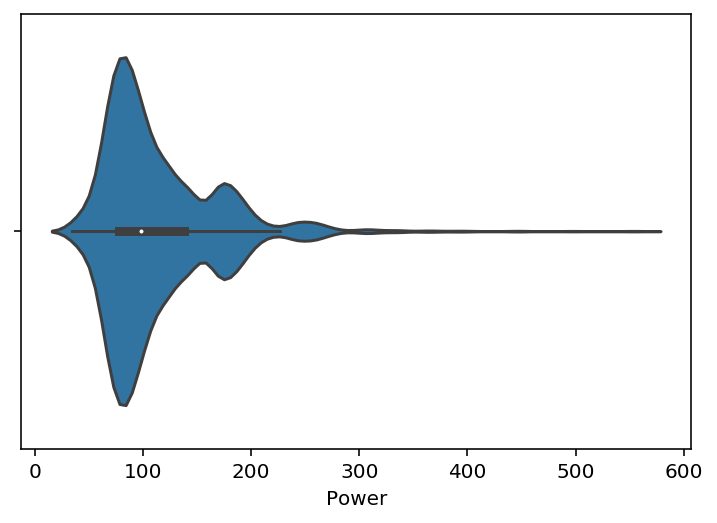

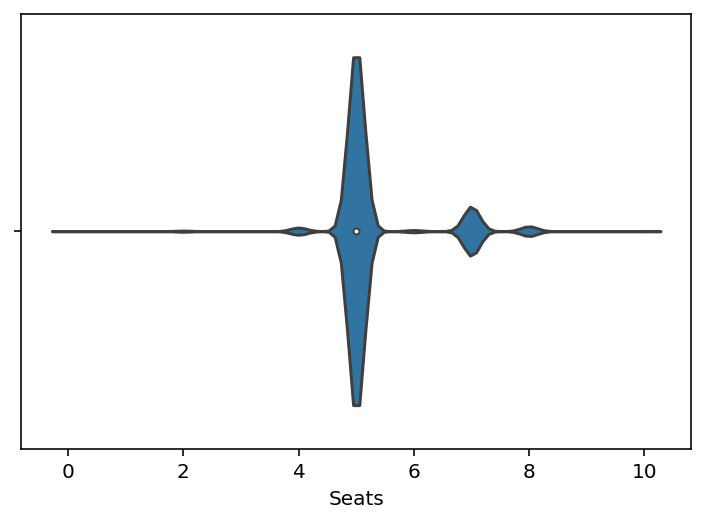

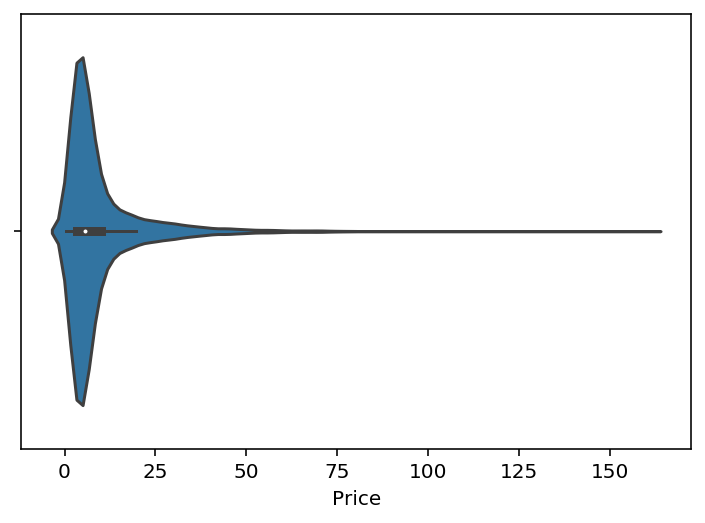

In [14]:
for col in ['Year', 'Kilometers_Driven', 'Mileage', 'Engine',
            'Power', 'Seats', 'Price']:
    sns.violinplot(x=data[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей

Посмотрим снова на наши данные и их типы:

In [15]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [16]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Изменим столбец `Name`, содержащий полное название модели автомоблия на столбец, содержащий лишь марку автомоблия:

In [17]:
data["Name"] = [name.split(' ', 1)[0] for name in data["Name"]]

In [18]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Выполним кодирование категориальных признаков:

In [19]:
le = LabelEncoder()
data[["Name"]] = le.fit_transform(
    data[["Name"]].values.ravel())

data[["Location"]] = le.fit_transform(
    data[["Location"]].values.ravel())

data[["Fuel_Type"]] = le.fit_transform(
    data[["Fuel_Type"]].values.ravel())

data[["Transmission"]] = le.fit_transform(
    data[["Transmission"]].values.ravel())

data[["Owner_Type"]] = le.fit_transform(
    data[["Owner_Type"]].values.ravel())

Посмотрим на новые типы данных:

In [20]:
data.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Выполним масштабирование данных:

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

Посмотрим на масштабированные данные:

In [22]:
data_scaled.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0.331326,1.143658,-1.027139,0.145315,-1.570306,0.632529,-0.463672,1.847798,-1.038232,-1.027107,-0.343293,-0.690934
1,-0.662260,1.481989,0.502161,-0.194369,-0.905771,0.632529,-0.463672,0.335076,-0.064226,0.249937,-0.343293,0.270004
2,-0.786458,-1.224657,-0.721279,-0.139581,1.087831,0.632529,-0.463672,0.014196,-0.703001,-0.453901,-0.343293,-0.445113
3,0.331326,-1.224657,-0.415419,0.309678,-0.905771,0.632529,-0.463672,0.575191,-0.621278,-0.452775,2.137237,-0.311028
4,-1.780044,-0.886327,-0.109559,-0.197985,-0.905771,-1.580955,1.980149,-0.640662,0.579552,0.523965,-0.343293,0.738405


Проверим, что масштабирование не повлияло на распределение данных:

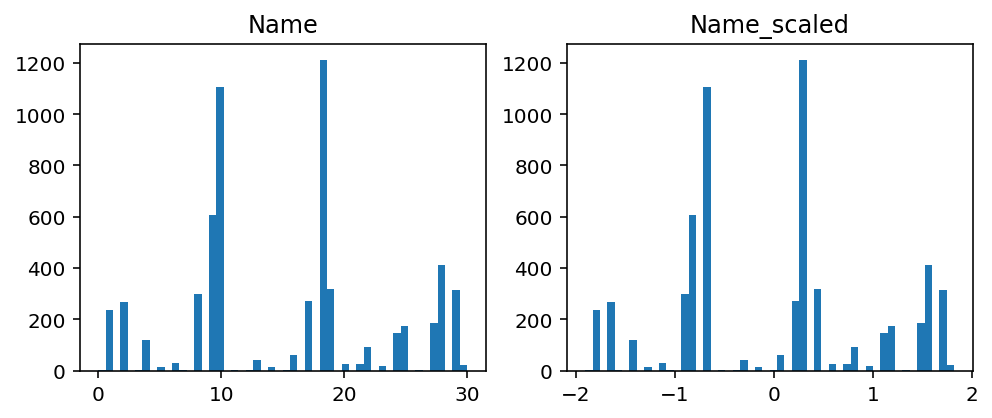

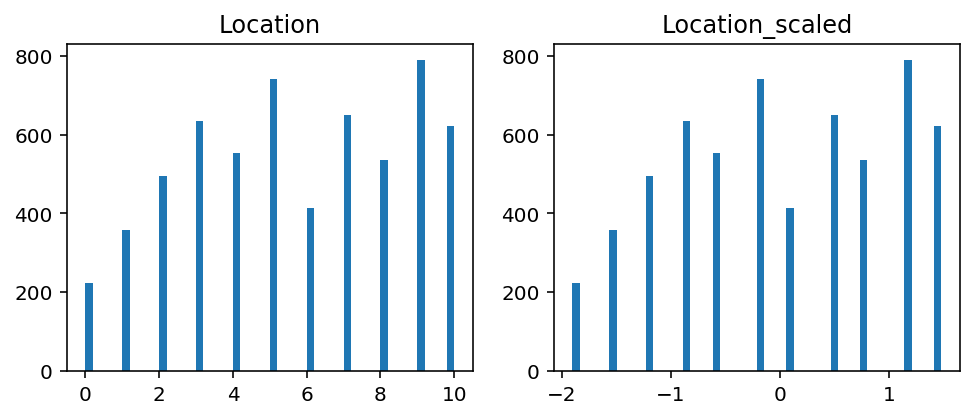

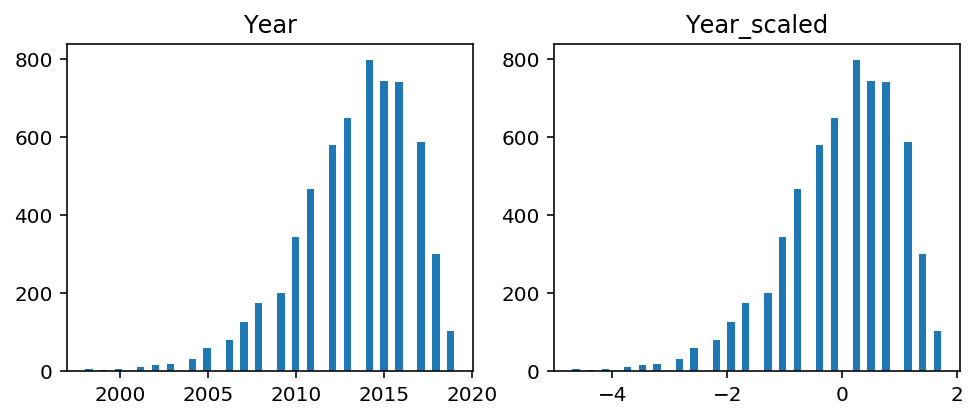

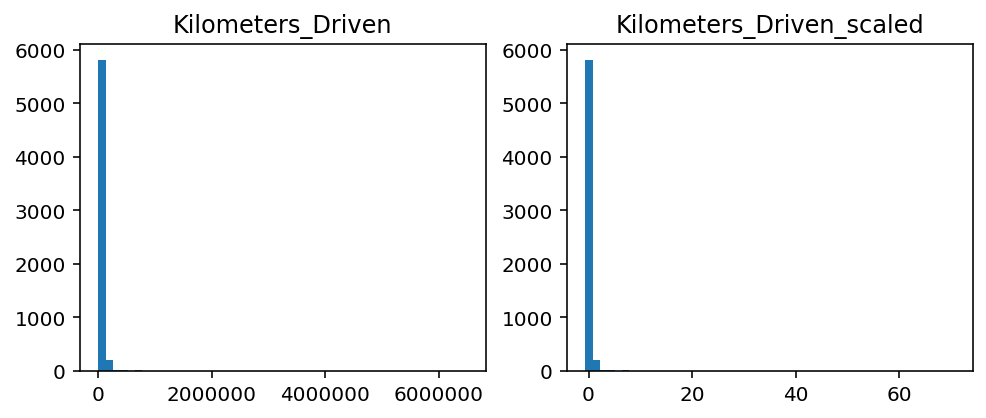

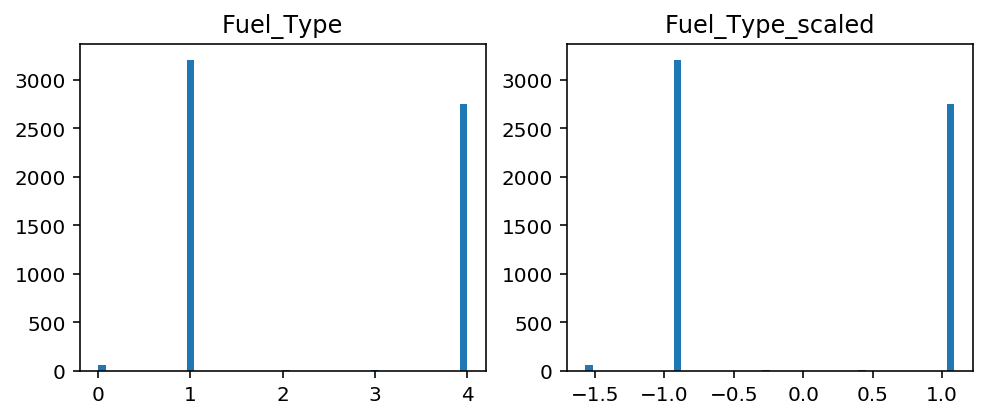

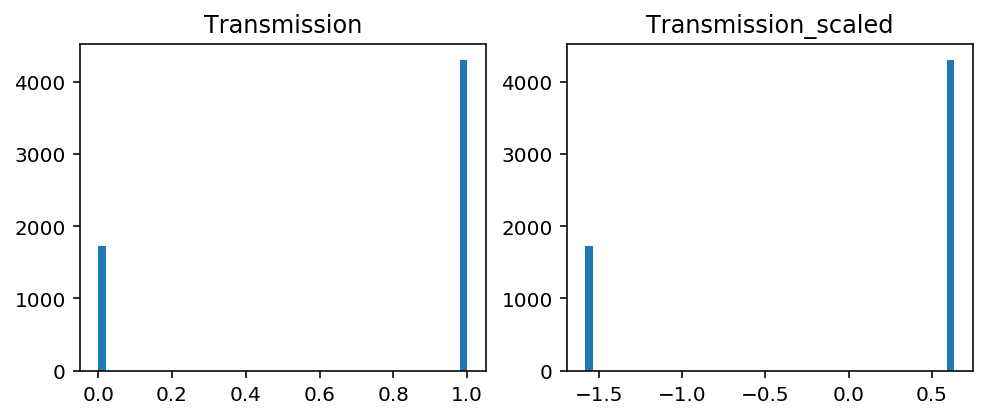

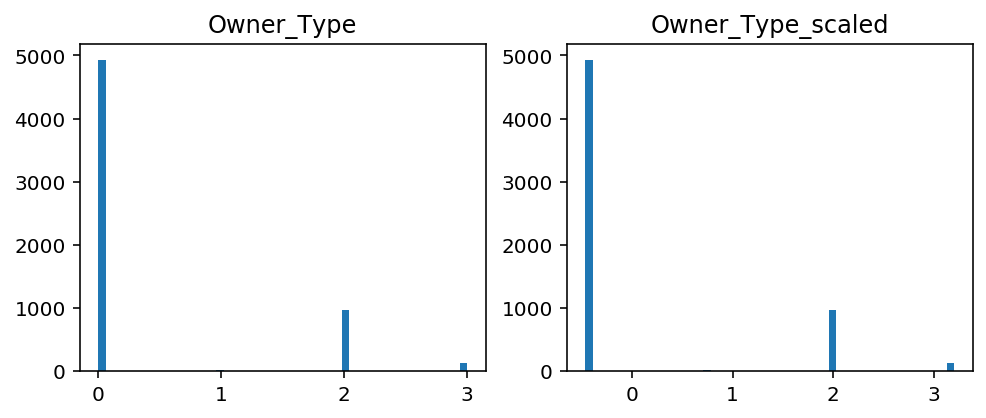

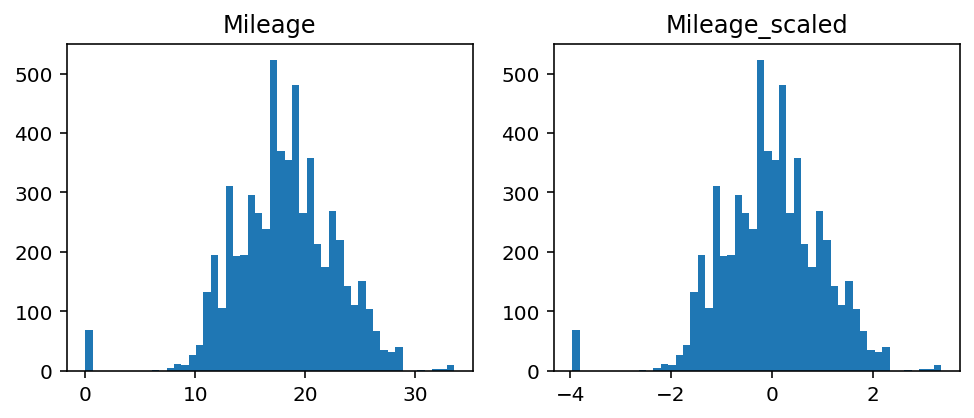

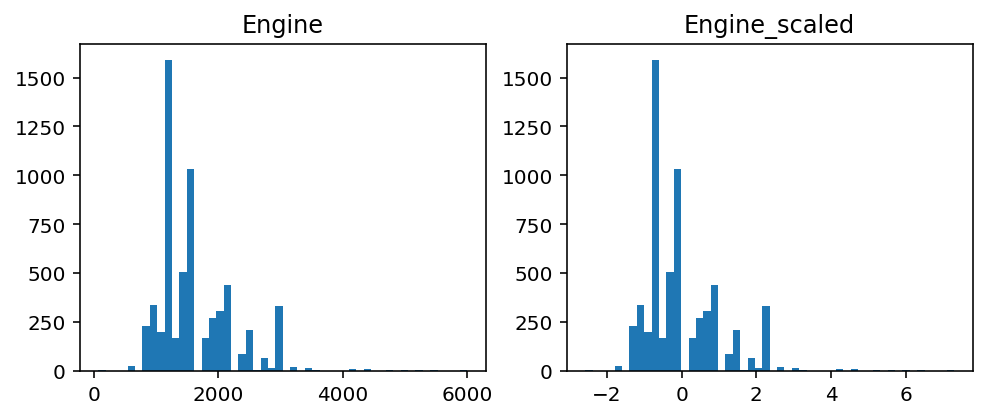

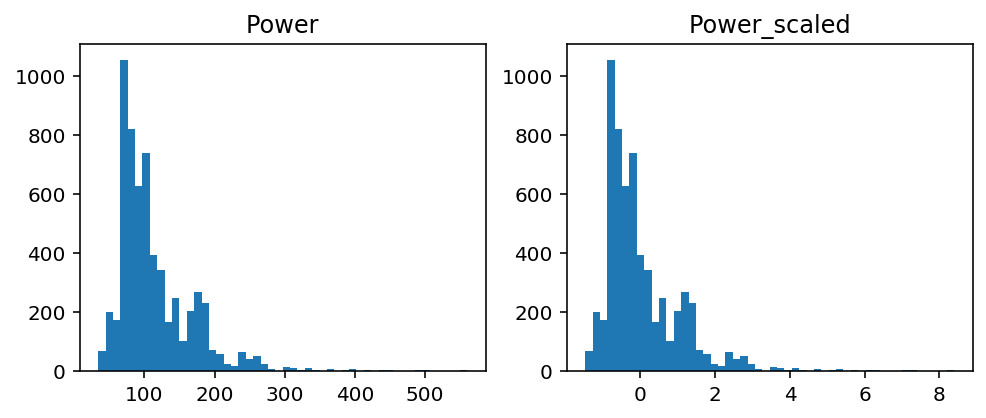

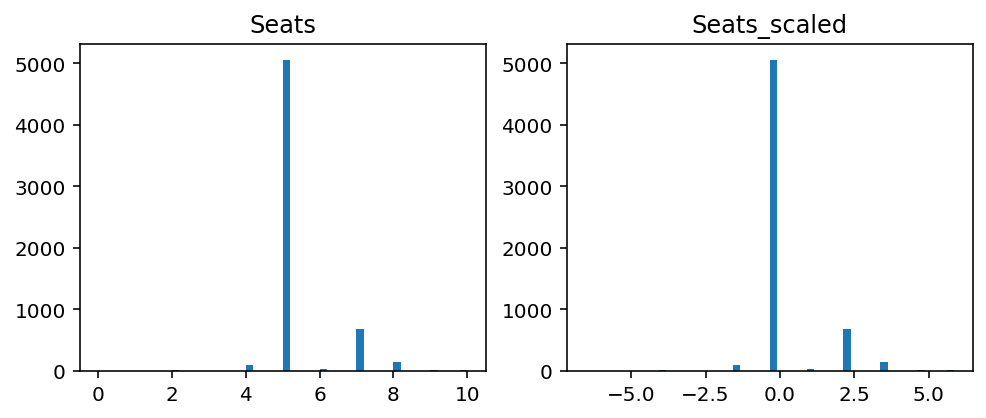

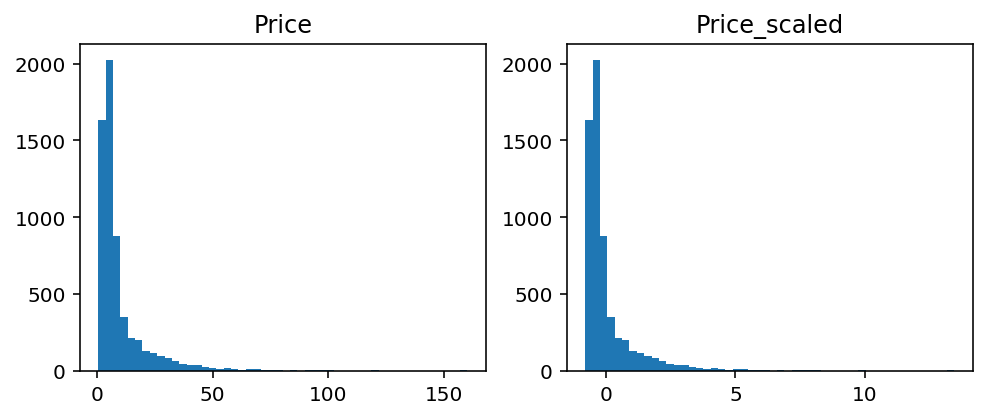

In [23]:
for column in data.columns:
    column_scaled = column + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[column], 50)
    ax[1].hist(data_scaled[column], 50)
    ax[0].title.set_text(column)
    ax[1].title.set_text(column_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения

Построим корреляционную матрицу для исходного набора данных и масштабированного:

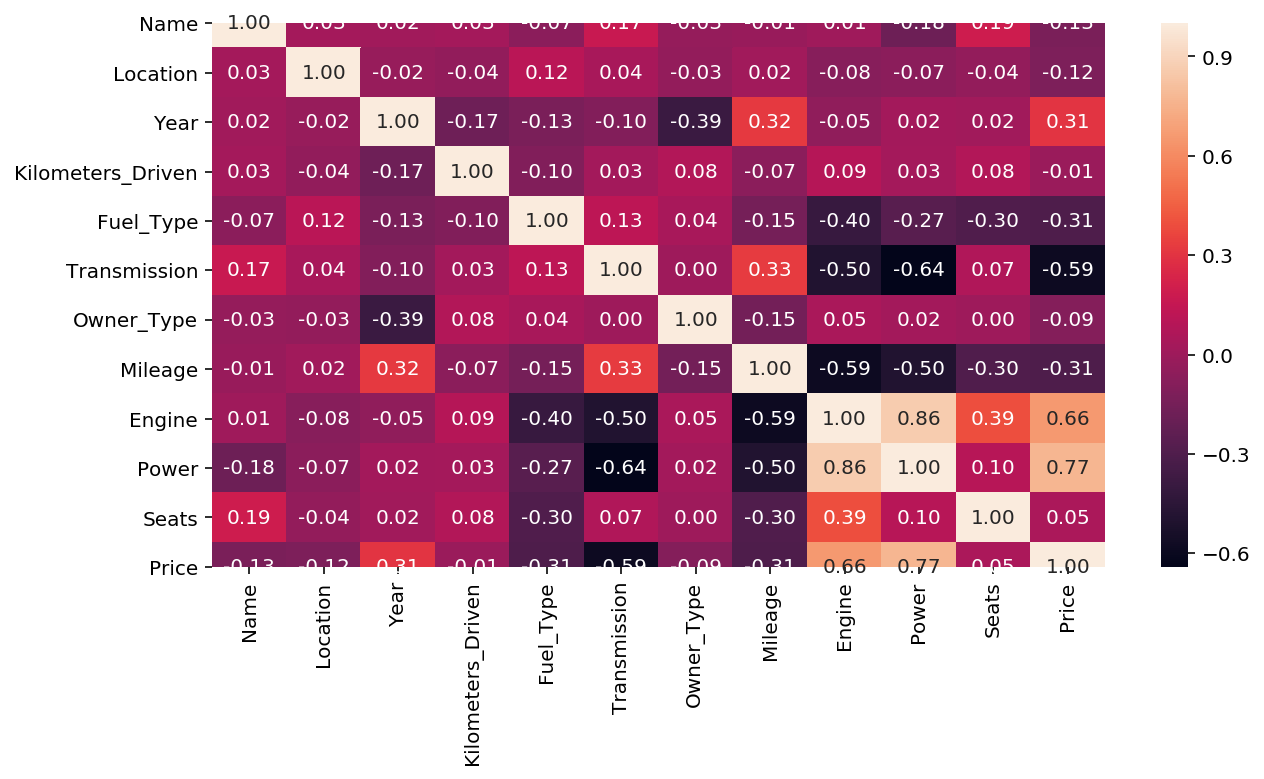

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

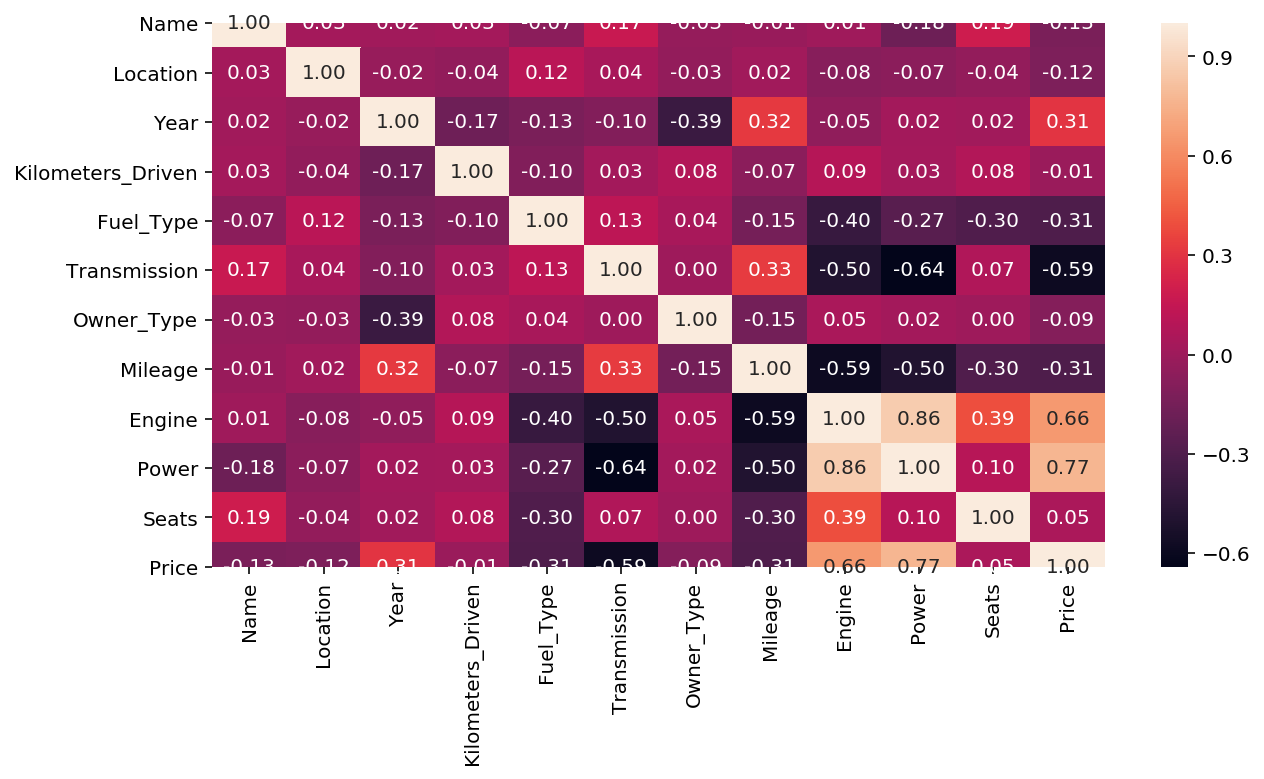

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_scaled.corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* Целевой признак регрессии `Price` наиболее сильно коррелирует с `Engine` (0.66) и `Power` (0.77). Однако эти признаки имеют корреляцию, близкую по модулю к 1, поэтому оба признака не следуют включать в модели. Будем использовать признак `Power`, так как он лучше чем `Engine` коррелирует с целевым признаком регрессии.
* Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

Удалим из данных столбец `Engine`:

In [26]:
data_scaled = data_scaled.drop(["Engine"], axis=1)

## Выбор метрик для последующей оценки качества моделей

В качестве метрик для решения задачи регрессии будем использовать:

1. [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2$

где:

- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

2. [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert$

где:

- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

3. [Метрика $R^2$ или коэффициент детерминации](https://en.wikipedia.org/wiki/Coefficient_of_determination) 

$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2}$

где:

- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки
- $\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i$

Чем ближе значение к единице, тем лучше качество регрессии.

Вычисляется с помощью функции [r2_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

Данные метрики были выбраны в силу того, что это самые используемые метрики для оценки качества моделей регрессии.

## Выбор наиболее подходящих моделей для решения задачи регрессии

Для задачи регрессии будем использовать следующие модели:

- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

Таким образом, мы постараемся оценить качество всех наиболее используемых на сегодня моделей регрессии.

## Формирование обучающей и тестовой выборок на основе исходного набора данных

Разделим данные на целевой столбец и признаки:

In [27]:
x = data_scaled.drop("Price", axis=1)
y = data_scaled["Price"]

In [28]:
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats
0,0.331326,1.143658,-1.027139,0.145315,-1.570306,0.632529,-0.463672,1.847798,-1.027107,-0.343293
1,-0.662260,1.481989,0.502161,-0.194369,-0.905771,0.632529,-0.463672,0.335076,0.249937,-0.343293
2,-0.786458,-1.224657,-0.721279,-0.139581,1.087831,0.632529,-0.463672,0.014196,-0.453901,-0.343293
3,0.331326,-1.224657,-0.415419,0.309678,-0.905771,0.632529,-0.463672,0.575191,-0.452775,2.137237
4,-1.780044,-0.886327,-0.109559,-0.197985,-0.905771,-1.580955,1.980149,-0.640662,0.523965,-0.343293


In [29]:
y.head()

0   -0.690934
1    0.270004
2   -0.445113
3   -0.311028
4    0.738405
Name: Price, dtype: float64

Разделим выборку на обучающую и тестовую<cite data-cite="doc:sklearn"></cite>:

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25,
                                                    random_state=77)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4514, 10), (1505, 10), (4514,), (1505,))

##  Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества:

In [32]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric) & 
                             (self.df['alg']==alg)].index, inplace=True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value',
                                            ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric,
                                                              ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

Модели:

In [33]:
regr_models = {'LR': LinearRegression(), 
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVR':SVR(C=1.0, gamma='scale'),
               'Tree':DecisionTreeRegressor(max_depth=10),
               'RF':RandomForestRegressor(n_estimators=100),
               'GB':GradientBoostingRegressor(n_estimators=100)}

Сохранение метрик:

In [34]:
regrMetricLogger = MetricLogger()

Напишем функцию, которая тренирует модель и считает её метрики:

In [35]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

И выполним обучение всех моделей с вычислением их метрик:

In [36]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

*****************************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MAE=0.324, MSE=0.279, R2=0.718
*****************************************************
*****************************************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

MAE=0.181, MSE=0.154, R2=0.844
*****************************************************
*****************************************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=0.172, MSE=0.145, R2=0.853
*****************************************************
*****************************************************
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None

Посмотрим на метрики в графическом виде:

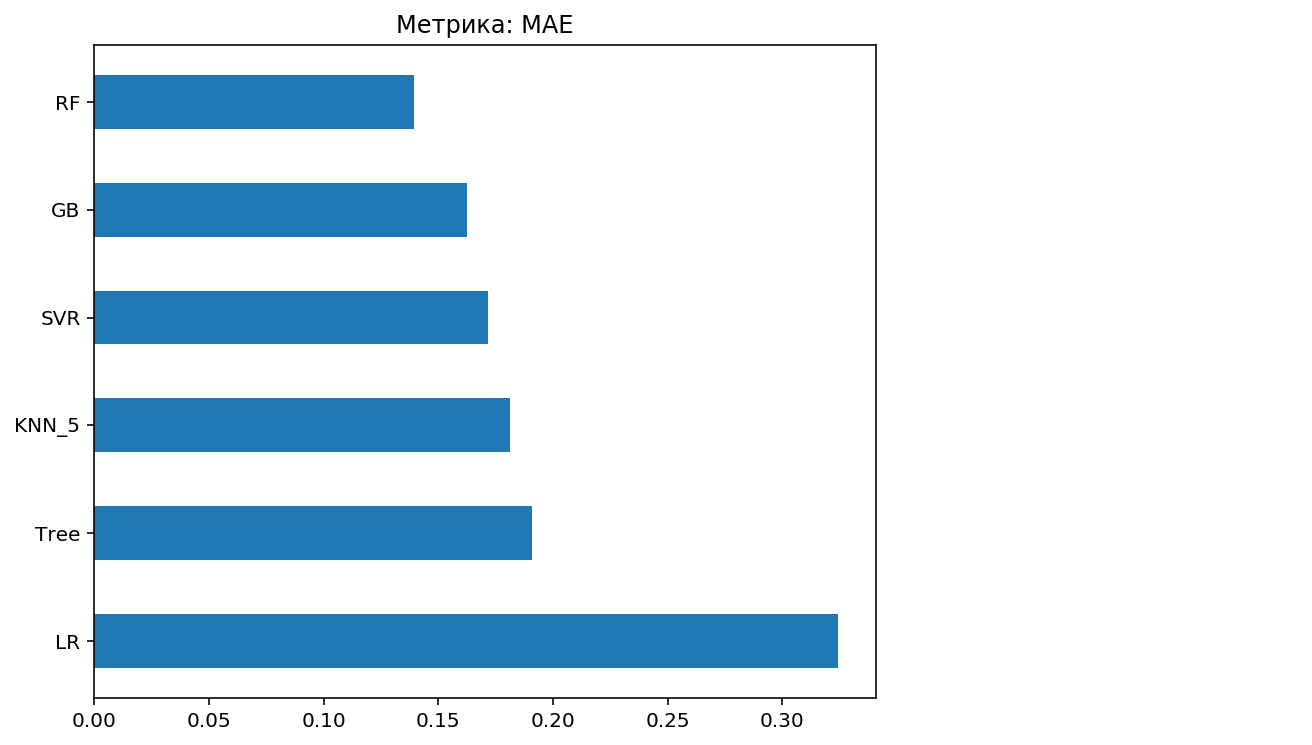

In [37]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE',
                      ascending=False, figsize=(7, 6))

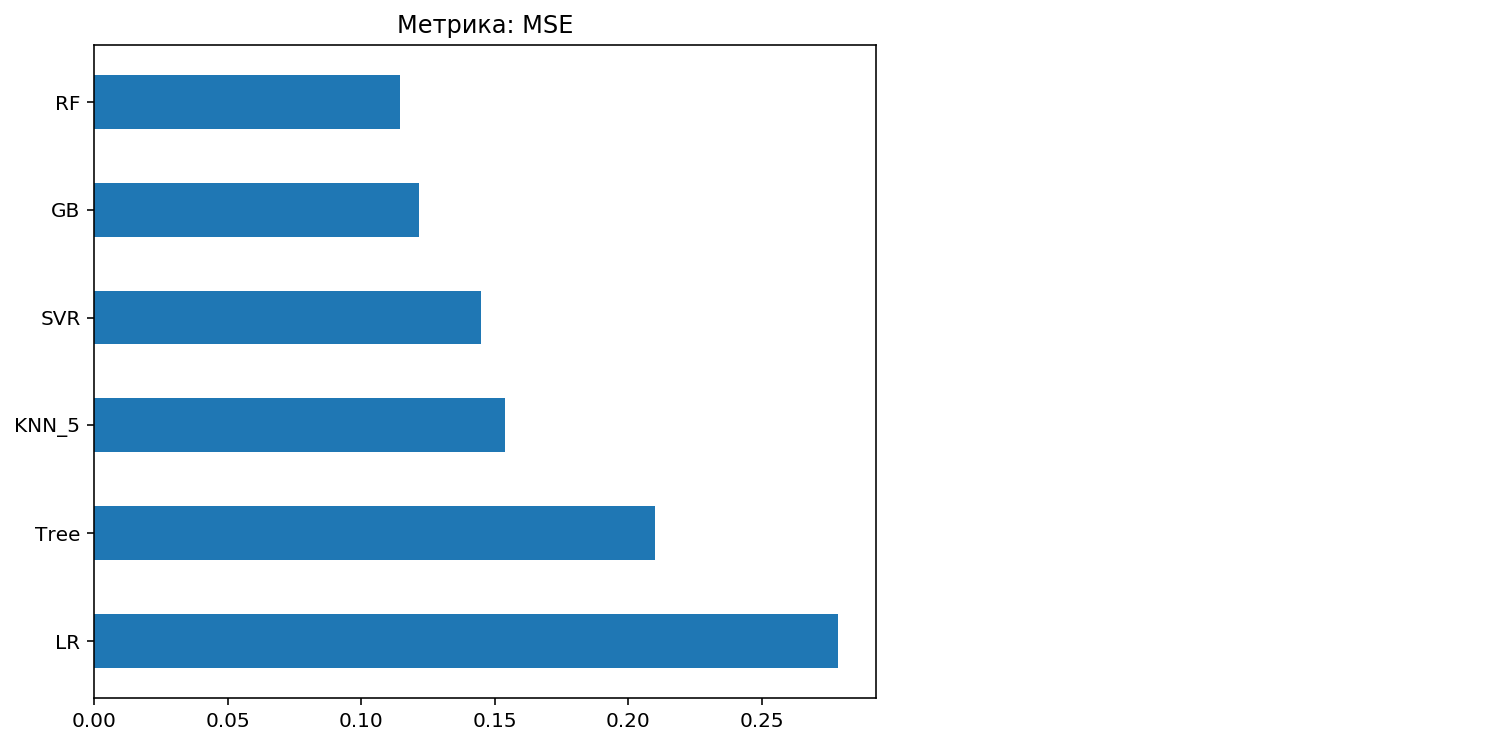

In [38]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE',
                      ascending=False, figsize=(7, 6))

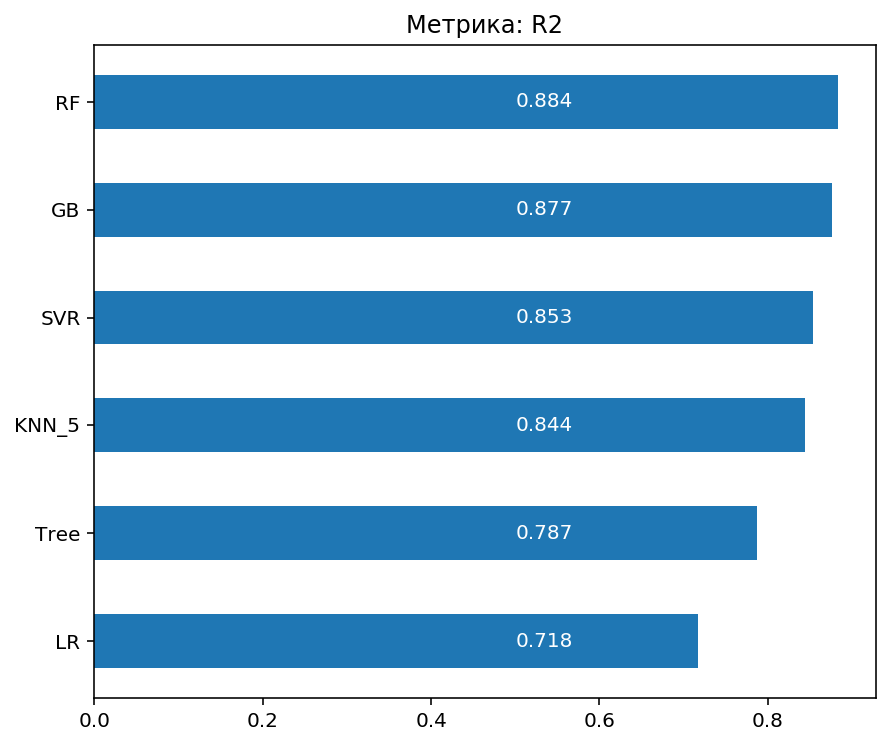

In [39]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))

В целом все модели, кроме линейной регрессии, справились с задачей довольно хорошо. Лучшими являются случайный лес, градиентный бустинг и машина опорных векторов

## Подбор гиперпараметра с испльзованием GridSearchCV и кросс-валидациии

Будем подбирать следующие гиперапараметры:

* `n_neighbors` для метода ближайших соседей;
* `С` для машины опорных векторов;
* `max_depth` для решающего дерева;
* `n_estimators` для случайного леса;
* `n_estimators` для градиентного бустинга.

Напишем функцию, которая будем подбирать гиперпараметр, тренировать модель с этим гиперпараметром и считать метрики полученной модели:

In [40]:
def regr_gs_train_model(model_name, model, regrMetricLogger):
    gs = GridSearchCV(model, tuned_parameters[model_name],
                      cv=ShuffleSplit(n_splits=5), n_jobs=-1,
                      scoring="r2", return_train_score=True)
    gs.fit(x, y) 
    
    model = gs.best_estimator_
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('*****************************************************')
    print('Best param: {}'.format(gs.best_params_))
    print(model)
    print()
    print('MAE={}, MSE={}, R2={}'.format(
        round(mae, 3), round(mse, 3), round(r2, 3)))
    print('*****************************************************')

Введем список настраиваемых параметров для каждой модели:

In [41]:
tuned_parameters = {}

param_range = np.arange(1, 1001, 100)
tuned_parameters['KNN_5'] = [{'n_neighbors': param_range}]

param_range = np.arange(1, 21, 1)
tuned_parameters['SVR'] = [{'C': param_range}]

param_range = np.arange(1, 51, 1)
tuned_parameters['Tree'] = [{'max_depth': param_range}]

param_range = np.arange(1, 201, 10)
tuned_parameters['RF'] = [{'n_estimators': param_range}]

param_range = np.arange(1, 201, 10)
tuned_parameters['GB'] = [{'n_estimators': param_range}]

И выполним написанную ранее функцию для каждой модели:

In [42]:
if "LR" in regr_models:
    regr_models.pop("LR")

for model_name, model in regr_models.items():
    regr_gs_train_model(model_name, model, regrMetricLogger)

*****************************************************
Best param: {'n_neighbors': 1}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

MAE=0.178, MSE=0.162, R2=0.836
*****************************************************
*****************************************************
Best param: {'C': 9}
SVR(C=9, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE=0.163, MSE=0.11, R2=0.889
*****************************************************
*****************************************************
Best param: {'max_depth': 7}
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_

Посмотрим на метрики в графическом виде:

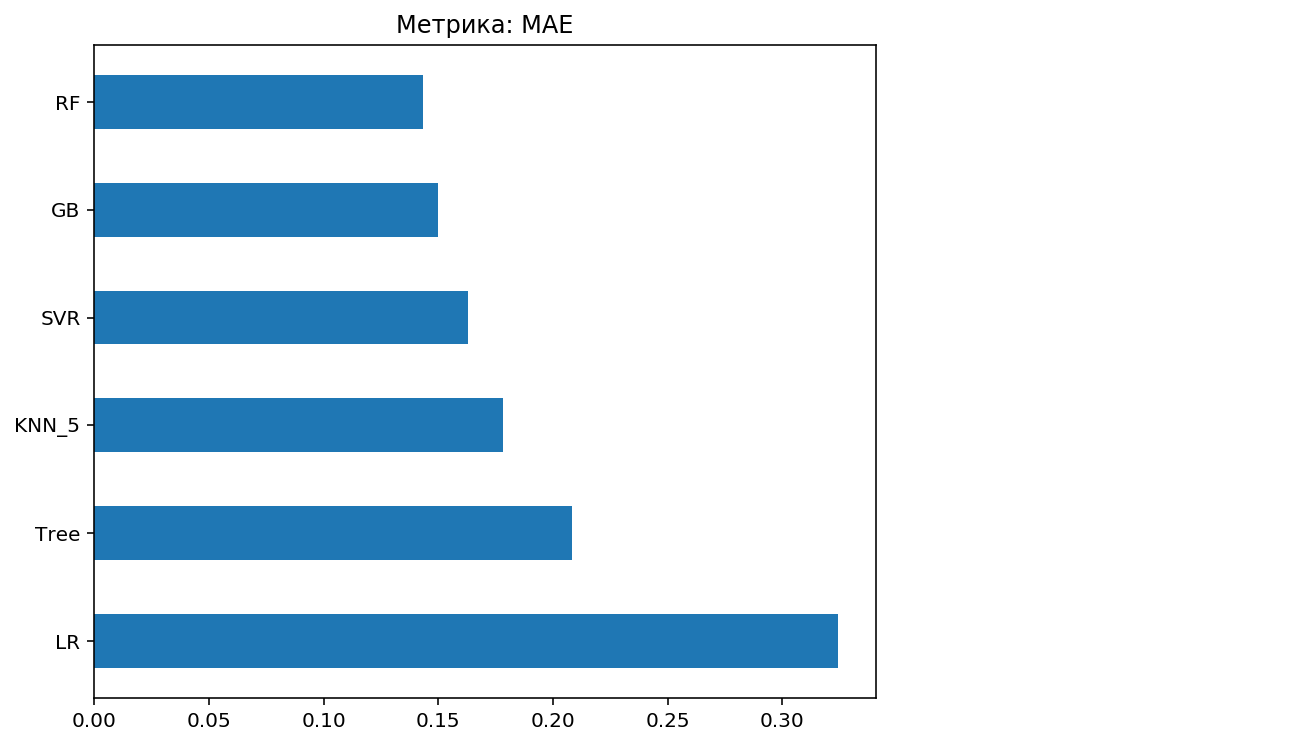

In [43]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE',
                      ascending=False, figsize=(7, 6))

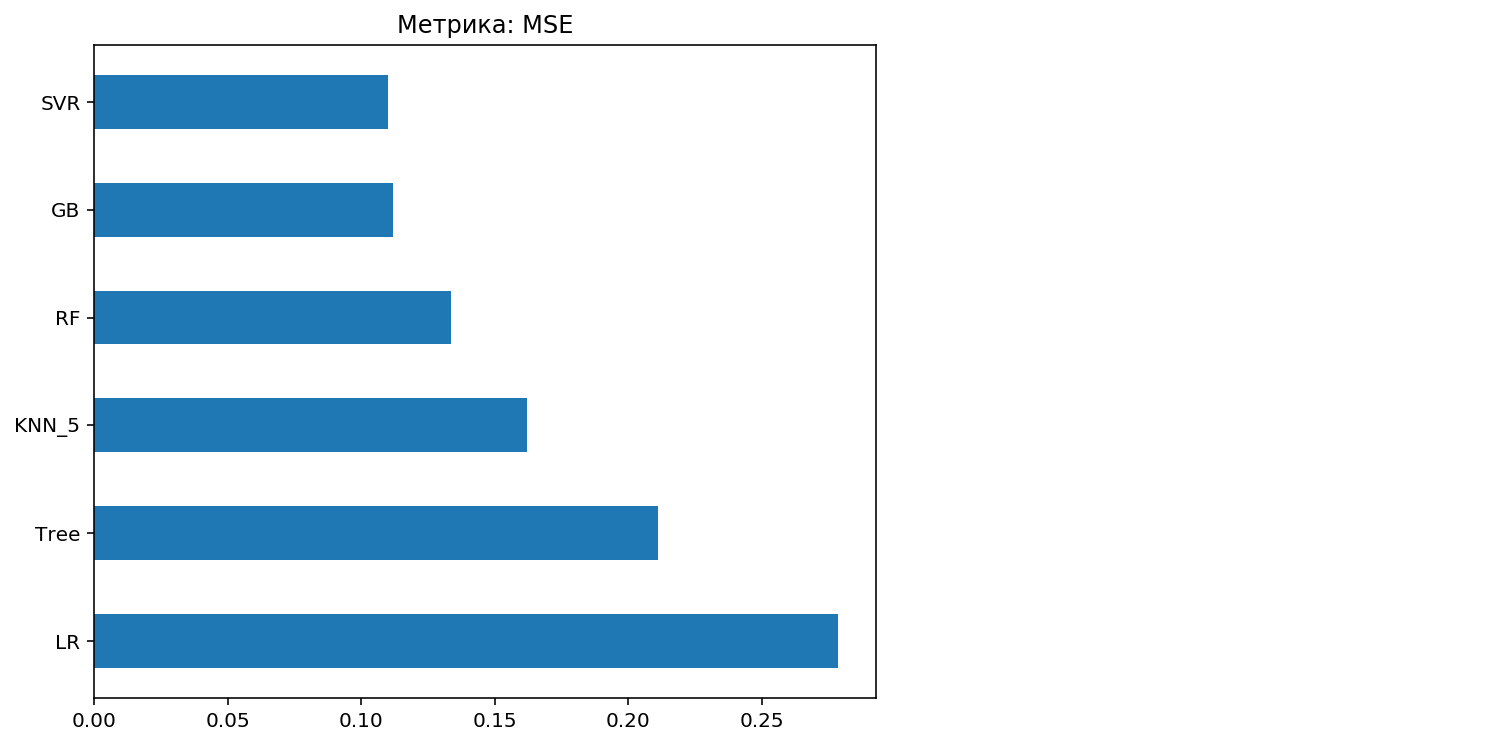

In [44]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE',
                      ascending=False, figsize=(7, 6))

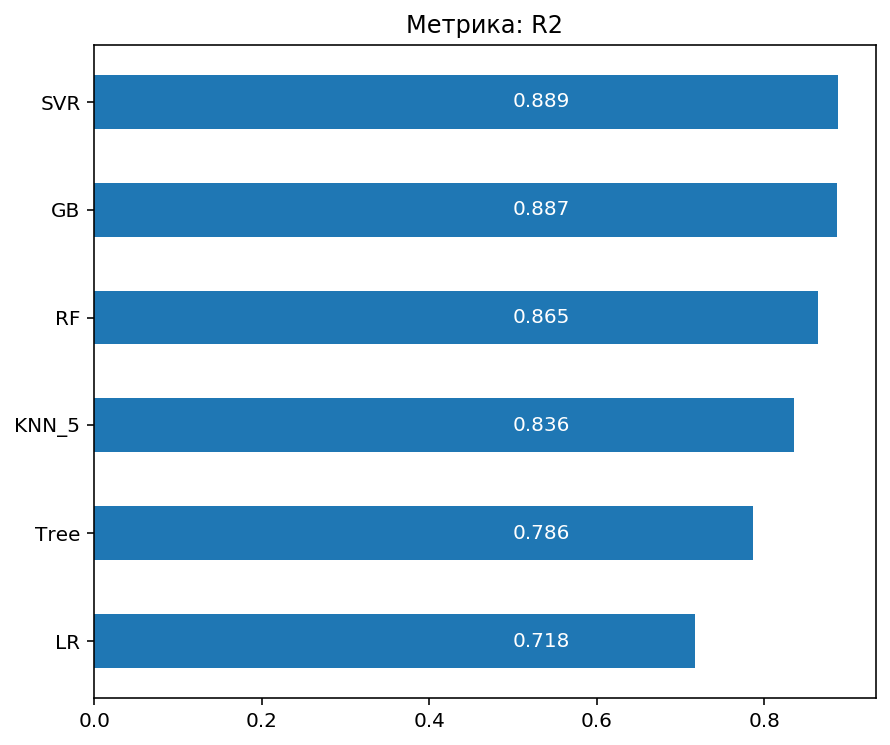

In [45]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2',
                      ascending=True, figsize=(7, 6))

С подобранными параметрами качество наших моделей немного улучшилось, но по-прежнему лучшими остались машина опорных векторов, случайный лес и градиентный бустинг.

## Выводы

Все построенные модели, кроме линейной регрессии, обладают очень хорошими показателями. При этом ансамблевые модели вместе с машиной опорных векторов показывают наилучшие результаты. Таким образом для дальнейшей работы стоит использовать именно эти модели.